In [10]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
import numpy as np
%matplotlib inline

In [126]:
#procedures =  pd.read_csv("Downloads\PROCEDUREEVENTS_MV.csv")
microbiology = pd.read_csv("C:\Users\Sahab\Desktop\MICROBIOLOGYEVENTS.csv\MICROBIOLOGYEVENTS.csv")

#### Table source: Hospital database.

#### Table purpose: Contains microbiology information, including tests performed and sensitivities.

#### Number of rows: 631,726

### Links to:

PATIENTS on SUBJECT_ID, 

ADMISSIONS on HADM_ID, 

D_ITEMS on SPEC_ITEMID,

D_ITEMS on ORG_ITEMID,

D_ITEMS on AB_ITEMID

### Important considerations

The MICROBIOLOGYEVENTS table does not contain cultures from samples taken outside the ICU
If the specimen is null, then the culture had no growth reported.


In [16]:
microbiology.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Detailed Description


#### CHARTDATE, CHARTTIME

CHARTTIME records the time at which an observation was charted, and is usually the closest proxy to the time the data was actually measured. CHARTDATE is the same as CHARTTIME, except there is no time available.

CHARTDATE was included as time information is not always available for microbiology measurements: in order to be clear about when this occurs, CHARTTIME is null, and CHARTDATE contains the date of the measurement.

In the cases where both CHARTTIME and CHARTDATE exists, CHARTDATE is equal to a truncated version of CHARTTIME (i.e. CHARTTIME without the timing information). Not all observations have a CHARTTIME, but all observations have a CHARTDATE.

#### SPEC_ITEMID, SPEC_TYPE_CD, SPEC_TYPE_DESC

Details the itemid, code, and description for the specimen.


#### INTERPRETATION

INTERPRETATION indicates the results of the test. “S” is sensitive, “R” is resistant, “I” is intermediate, and “P” is pending.




In [17]:
microbiology.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
CHARTDATE                   0
CHARTTIME               41772
SPEC_ITEMID                79
SPEC_TYPE_DESC              0
ORG_ITEMID             304845
ORG_NAME               303710
ISOLATE_NUM            303710
AB_ITEMID              355892
AB_NAME                355892
DILUTION_TEXT          364376
DILUTION_COMPARISON    364548
DILUTION_VALUE         364548
INTERPRETATION         355892
dtype: int64

Unique 	SPEC_TYPE_DESC
87
BLOOD CULTURE                               179930
URINE                                       140671
SPUTUM                                       99887
SWAB                                         37895
MRSA SCREEN                                  32280
STOOL                                        26427
CATHETER TIP-IV                              21216
BRONCHOALVEOLAR LAVAGE                       11613
BLOOD CULTURE - NEONATE                      10032
TISSUE                                        9151
BLOOD CULTURE ( MYCO/F LYTIC BOTTLE)          6638
PERITONEAL FLUID                              5982
CSF;SPINAL FLUID                              5526
ABSCESS                                       4875
SEROLOGY/BLOOD                                4853
FLUID,OTHER                                   4605
PLEURAL FLUID                                 4110
BILE                                          3549
FLUID RECEIVED IN BLOOD CULTURE BOTTLES       2358
BRONC

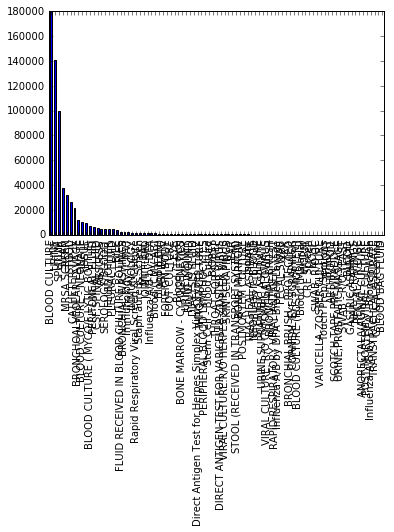

In [26]:
print "Unique 	SPEC_TYPE_DESC"
print len(microbiology.SPEC_TYPE_DESC.unique())
print microbiology.SPEC_TYPE_DESC.value_counts()
microbiology.SPEC_TYPE_DESC.value_counts().plot(kind = 'bar')

In [23]:
print "Unique 	ITEMID"
print len(microbiology.SPEC_ITEMID.unique())
#print microbiology.SPEC_ITEMID.value_counts()

Unique 	ITEMID
93


In [19]:
print "Unique 	ORG_NAME"
print len(microbiology.ORG_NAME.unique())
print microbiology.ORG_NAME.value_counts()


Unique 	ORG_NAME
363
STAPH AUREUS COAG +                                63947
ESCHERICHIA COLI                                   60133
STAPHYLOCOCCUS, COAGULASE NEGATIVE                 32777
KLEBSIELLA PNEUMONIAE                              30628
PSEUDOMONAS AERUGINOSA                             28926
ENTEROCOCCUS SP.                                   16429
YEAST                                              14182
PROTEUS MIRABILIS                                   9605
ENTEROBACTER CLOACAE                                8709
SERRATIA MARCESCENS                                 6054
KLEBSIELLA OXYTOCA                                  5331
GRAM NEGATIVE ROD(S)                                3486
ENTEROBACTER AEROGENES                              2842
ENTEROCOCCUS FAECIUM                                2689
ACINETOBACTER BAUMANNII                             2582
NON-FERMENTER, NOT PSEUDOMONAS AERUGINOSA           2487
CITROBACTER FREUNDII COMPLEX                        2305
POSITIVE F

# CONCLUSION

Feature to consider is : SPEC_TYPE_DESC (non null) (only top 7 + others)
    

In [127]:
def getmicroClassification(row):

    types = ['BLOOD CULTURE', 'URINE', 'SPUTUM', 'SWAB', 'MRSA SCREEN', 'STOOL', 'CATHETER TIP-IV','BRONCHOALVEOLAR LAVAGE']
    row = str(row)
    if (row in types):
        return row
    else:
        #print "gh"
        return "OTHER"
    
microbiology['microType'] = microbiology['SPEC_TYPE_DESC'].map(getmicroClassification)
    

9
BLOOD CULTURE             179930
URINE                     140671
SPUTUM                     99887
OTHER                      81807
SWAB                       37895
MRSA SCREEN                32280
STOOL                      26427
CATHETER TIP-IV            21216
BRONCHOALVEOLAR LAVAGE     11613
Name: microType, dtype: int64


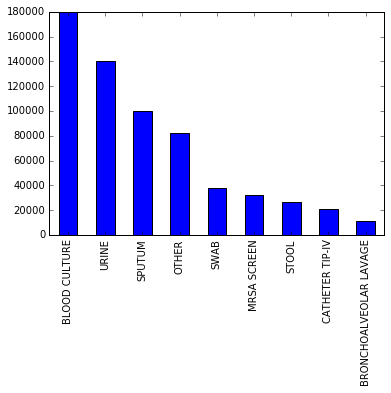

In [128]:
print len(microbiology.microType.unique())
print microbiology.microType.value_counts()
%matplotlib inline
microbiology.microType.value_counts().plot(kind = 'bar')

In [129]:
del microbiology['DILUTION_COMPARISON']
del microbiology['DILUTION_VALUE']
del microbiology['INTERPRETATION']
del microbiology['AB_NAME']
del microbiology['AB_ITEMID']
del microbiology['ROW_ID']
del microbiology['CHARTTIME']
del microbiology['DILUTION_TEXT']
del microbiology['ISOLATE_NUM']
del microbiology['SPEC_TYPE_DESC']
del microbiology['SPEC_ITEMID']
del microbiology['ORG_ITEMID']
del microbiology['ORG_NAME']
del microbiology['CHARTDATE']
microbiology.head(20)

,SUBJECT_ID,HADM_ID,microType
0,96,170324,BRONCHOALVEOLAR LAVAGE
1,96,170324,SPUTUM
2,96,170324,BLOOD CULTURE
3,96,170324,BLOOD CULTURE
4,96,170324,URINE
5,96,170324,SPUTUM
6,101,175533,URINE
7,101,175533,BLOOD CULTURE
8,101,175533,BLOOD CULTURE
9,101,175533,SPUTUM


In [45]:
types = ['BLOOD CULTURE', 'URINE', 'SPUTUM', 'SWAB', 'MRSA SCREEN', 'STOOL', 'CATHETER TIP-IV','BRONCHOALVEOLAR LAVAGE']

for i in types:
    microbiology[i] = 0

In [47]:
colMicro = pd.DataFrame()

In [49]:
for i in types:
    colMicro[i] = 0
colMicro['HADM_ID'] = 0
colMicro['SUBJECT_ID'] = 0

In [50]:
colMicro

,BLOOD CULTURE,URINE,SPUTUM,SWAB,MRSA SCREEN,STOOL,CATHETER TIP-IV,BRONCHOALVEOLAR LAVAGE,HADM_ID,SUBJECT_ID


In [46]:
hadmId = 0
subID = 0

def aggregateRows(row):
    
    hadm = row['HADM_ID']
    sub = row['SUBJECT_ID']
    
    if(hadm != hadmID):
        colMicro['HADM_ID'] = hadm
        colMicro['SUBJECT_ID'] = sub
    
    
    

,SUBJECT_ID,HADM_ID,microType,BLOOD CULTURE,URINE,SPUTUM,SWAB,MRSA SCREEN,STOOL,CATHETER TIP-IV,BRONCHOALVEOLAR LAVAGE
0,96,170324,BRONCHOALVEOLAR LAVAGE,0,0,0,0,0,0,0,0
1,96,170324,SPUTUM,0,0,0,0,0,0,0,0
2,96,170324,BLOOD CULTURE,0,0,0,0,0,0,0,0
3,96,170324,BLOOD CULTURE,0,0,0,0,0,0,0,0
4,96,170324,URINE,0,0,0,0,0,0,0,0
5,96,170324,SPUTUM,0,0,0,0,0,0,0,0
6,101,175533,URINE,0,0,0,0,0,0,0,0
7,101,175533,BLOOD CULTURE,0,0,0,0,0,0,0,0
8,101,175533,BLOOD CULTURE,0,0,0,0,0,0,0,0
9,101,175533,SPUTUM,0,0,0,0,0,0,0,0


In [125]:
microbiology.head(5)
microbiology[microbiology.HADM_ID == 100003]
#del microbiology['SUBJECT_ID']

,HADM_ID,microType
474135,100003,BLOOD CULTURE
474136,100003,MRSA SCREEN
474137,100003,BLOOD CULTURE
474138,100003,URINE
474139,100003,OTHER


In [151]:
table = pd.pivot_table(microbiology, values = ['SUBJECT_ID'], index=['HADM_ID'], columns=['microType'] , aggfunc='count', fill_value = 0)

In [147]:
table.rows = table.rows.droplevel()

AttributeError: 'DataFrame' object has no attribute 'rows'

In [154]:
table.columns = table.columns.droplevel()

In [152]:
#table.dropna()
table.index.name = None

In [155]:
table

microType,BLOOD CULTURE,BRONCHOALVEOLAR LAVAGE,CATHETER TIP-IV,MRSA SCREEN,OTHER,SPUTUM,STOOL,SWAB,URINE
100001,1,0,0,1,0,0,1,0,1
100003,2,0,0,1,1,0,0,0,1
100006,0,0,0,0,0,3,0,1,0
100007,1,0,0,0,0,1,2,0,1
100009,0,0,0,1,1,0,0,0,1
100011,8,11,0,1,0,3,0,0,4
100012,0,0,0,2,1,0,0,0,0
100016,2,0,0,0,0,1,1,0,1
100018,0,0,0,1,0,1,0,0,1
100020,2,0,0,0,0,0,1,0,4


In [156]:
table.columns

Index([u'BLOOD CULTURE', u'BRONCHOALVEOLAR LAVAGE', u'CATHETER TIP-IV',
       u'MRSA SCREEN', u'OTHER', u'SPUTUM', u'STOOL', u'SWAB', u'URINE'],
      dtype='object', name=u'microType')

In [160]:
table.to_csv("MICRO.csv")